### Description 
This dataset contains cases from a study that was conducted between 1958 and 1970 at the University 
of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

There are 4 features or columns in this dataset. Below is the meaning of each feature.


<b>age</b> &nbsp; &nbsp; :  &nbsp; &nbsp; Age of the person at the time of surgery. <br>
<b>year</b> &nbsp; &nbsp; :  &nbsp; &nbsp; Year when operation was done. <br>
<b>nodes</b> &nbsp;       :  &nbsp; &nbsp; Number of axillary nodes detected. <br>
<b>status</b> &nbsp;      : &nbsp; &nbsp; Did the patient survive for more than 5 year (status=1) or 
                                 Did the patient die within 5 years (status=2) <br>


### Objective 
Check if surgery increased the chance of survival for breast cancer patients? 
What was the most important factor involved here?


In [1]:
# Importing the modules

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:


# Load the dataset
haberman=pd.read_csv('haberman.csv',header='infer')

# number of data points 
print('Number of data points for each variable : ', len(haberman))

# features 
print('\nfeatures: \n',haberman.columns)   # 4 features 

# sample data 
print('\nsample data:\n',haberman.head())

# Survival status has two values 1 and 2 as mentioned in the data information. 
# We can convert them into string to use it as class labels for better readability.

haberman.status=list(map(lambda x:'Yes' if x==1 else 'No',haberman.status))

# Data points per class
print('\nData points per class:\n',haberman.status.value_counts())  



Number of data points for each variable :  306

features: 
 Index(['age', 'year', 'nodes', 'status'], dtype='object')

sample data:
    age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1

Data points per class:
 Yes    225
No      81
Name: status, dtype: int64


<b>Note:</b> Since There is big difference between the number of survived and not survived people. So it is imbalanced data. <br>
Survived: 225 <br> Not survived: 81 <br> 

In [3]:
# Divide the dataset into survived and not survived

Survived=haberman[haberman.status=='Yes']
Not_Survived=haberman[haberman.status=='No']

Survived.head()


,age,year,nodes,status
0,30,64,1,Yes
1,30,62,3,Yes
2,30,65,0,Yes
3,31,59,2,Yes
4,31,65,4,Yes


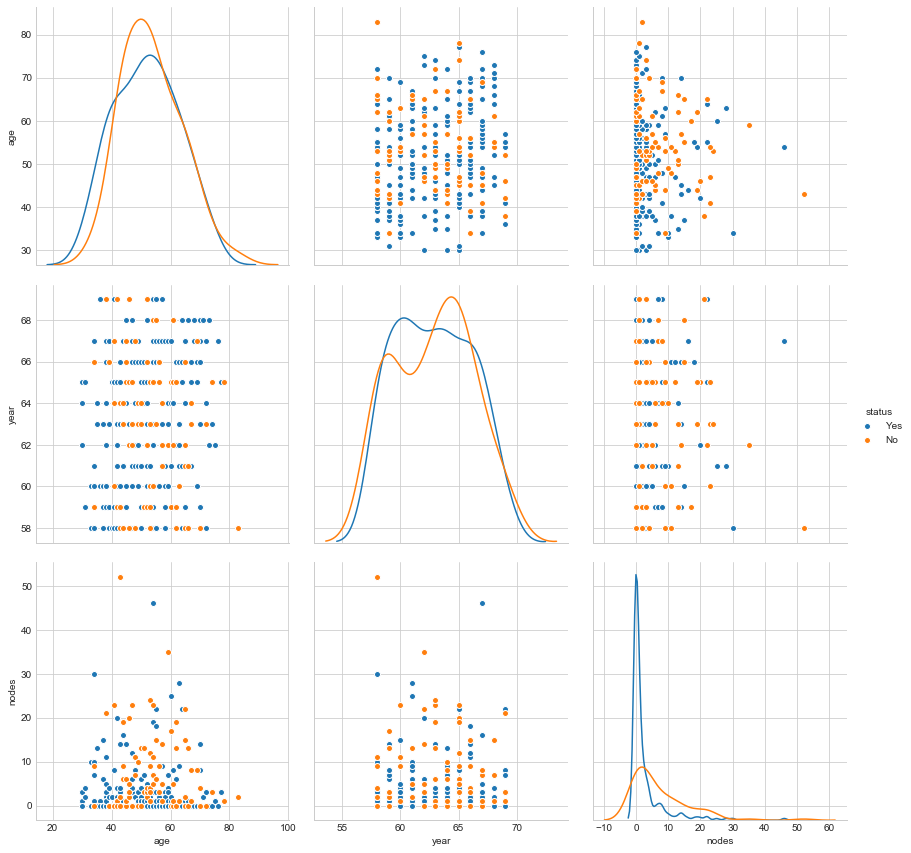

In [4]:
# Doing basic pairplot analysis to understand if there is any relationship between two variables.

sns.set_style('whitegrid')
sns.pairplot(haberman,hue='status',size=4,diag_kind='kde')
plt.show()
 

<br>
<b>Note:</b> It is difficult to draw conclusion as the points are not well separated in any of the scatter plots.  Therefore we will do the univariate analysis for features age, year and nodes to check how important the feature is.
<br>

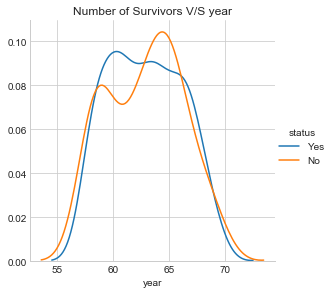

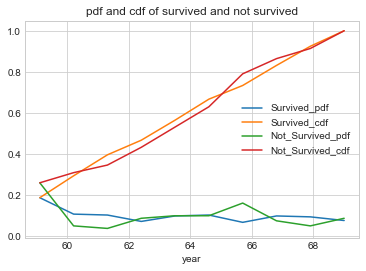

In [5]:
# Let us study each variable one by one. # year

# Trend of Survival for the given years after the surgery was implemented. 
sns.set_style('whitegrid')
sns.FacetGrid(haberman,hue='status',size=4).map(sns.distplot,'year',hist=False).add_legend()
plt.title('Number of Survivors V/S year')
plt.show()

# pdf and cdf for survivors and non-survivors

counts, bin_edges=np.histogram(Survived.year,bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label='Survived_pdf')
plt.plot(bin_edges[1:], cdf, label='Survived_cdf')

counts, bin_edges=np.histogram(Not_Survived.year,bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label='Not_Survived_pdf')
plt.plot(bin_edges[1:], cdf, label='Not_Survived_cdf')
plt.legend(loc='center right')
plt.title('pdf and cdf of survived and not survived')
plt.xlabel('year')
plt.show()




<b>Analysis</b> <br>
Number of survivors and non-survivors also were highest in the same period i.e. between 1960 and 1965.
If we assume that same surgery procedure was used and surgery was really effective, then number of survivals should have increased thoughout over the years but this is not the case.
So Operation Year did not make any difference. Moreover if we see the pdfs and cdfs of survivors and non-survivors, they run together in parallel and are not separate at all. So we can't make any conclusion from year feature. 

<b>Conclusion for year</b> : year is not alone key factor to decide the effectiveness of surgery.


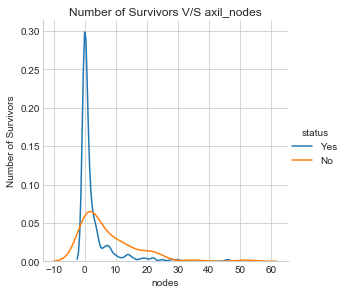

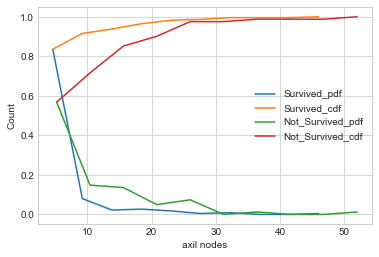

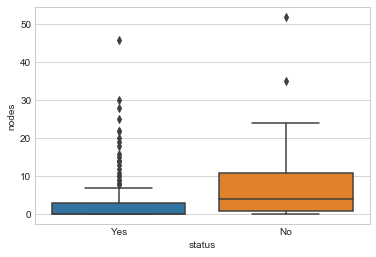

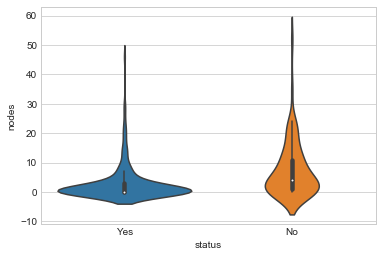

Survivor's quartile information
--------------------------------
quartile data [ 0.  0.  0.  3. 46.]
80% Survived people have axil nodes <= 4.0

Non-Survivor's quartile and outlier information
--------------------------------
quartile data [ 0.  1.  4. 11. 52.]
50% Survived people have axil nodes <= 4.0


In [6]:
# Axil nodes Univariate analysis

# Trend of Survival for different nodes patients. 

sns.set_style('whitegrid')
sns.FacetGrid(haberman,hue='status',size=4).map(sns.distplot,'nodes',hist=False).add_legend()
plt.ylabel('Number of Survivors')
plt.title('Number of Survivors V/S axil_nodes')
plt.show()

# pdf and cdf for survivors and non-survivors

counts, bin_edges=np.histogram(Survived.nodes,bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label='Survived_pdf')
plt.plot(bin_edges[1:], cdf, label='Survived_cdf')

counts, bin_edges=np.histogram(Not_Survived.nodes,bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label='Not_Survived_pdf')
plt.plot(bin_edges[1:], cdf, label='Not_Survived_cdf')
plt.legend(loc='center right')
plt.xlabel('axil nodes')
plt.ylabel('Count')
plt.show()

# Lets use the box plot and violion plot to find some insight.

plt.close()
sns.boxplot(x='status',y='nodes',data=haberman)
plt.show()

plt.close()
sns.violinplot(x='status',y='nodes',data=haberman)
plt.show()


# Quartile information for survivors.

print("Survivor's quartile information")
print("--------------------------------")

print('quartile data',np.percentile(Survived.nodes,np.arange(0,101,25)))
print('80% Survived people have axil nodes <=',np.percentile(Survived.nodes,80))

# Quartile information for Non-survivors.

print("\nNon-Survivor's quartile and outlier information")
print("--------------------------------")

print('quartile data',np.percentile(Not_Survived.nodes,np.arange(0,101,25)))
print('50% Survived people have axil nodes <=',np.percentile(Not_Survived.nodes,50))



<b>Analysis</b><br>

From distribution plot of axil nodes we see that for both survivors and non-survivors we have high density for low axil nodes. This means that majority of the population tend to generally have low axil nodes. 

From PDF and CDF, 80% of the survived have low nodes (nodes<=4) and 50% of non-survivors also have low axil nodes(nodes<=4).
Further PDFs are not separated well so it is difficult to make any conclusion about axil nodes as well. 


<b>Insights from box and violin plots</b><br>
80% of the Survived population has nodes<=4, <br>
From box plot there are low percentage (11.5%) of outliers  (len(Survived[Survived.nodes>7.5])/len(Survived))) calculated from below formula <br>
7.5=IQR + IQR*1.5 where IQR=3

violin for survivors is very wide around 0 meaning that half of Survival population has nodes=0. <br>
violin for non-survivors is very wide around 0 meaning that half of non-Survival population has nodes=4.

<b>Conclusion for axil nodes</b><br>
It may appear that low axil nodes could favour survivals. But we do have 50% of non-survivors having low axil nodes. This make the whole argument of dependence on nodes inconclusive.

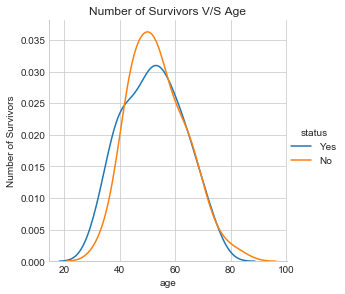

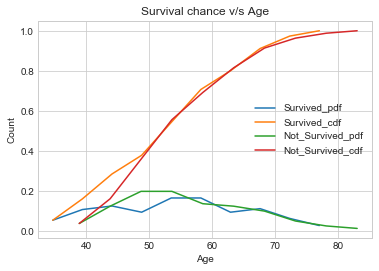

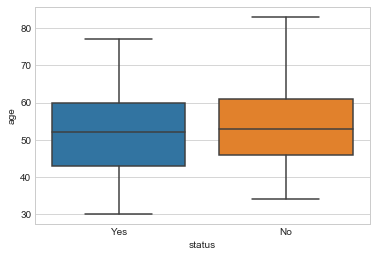

In [7]:
# Univariate analysis for Age 

sns.set_style('whitegrid')
sns.FacetGrid(haberman,hue='status',size=4).map(sns.distplot,'age',hist=False).add_legend()
plt.ylabel('Number of Survivors')
plt.title('Number of Survivors V/S Age')
plt.show()


# PDF and CDF for Age for survivor and non survivor

plt.close()
counts, bin_edges=np.histogram(Survived.age,bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label='Survived_pdf')
plt.plot(bin_edges[1:], cdf, label='Survived_cdf')

counts, bin_edges=np.histogram(Not_Survived.age,bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label='Not_Survived_pdf')
plt.plot(bin_edges[1:], cdf, label='Not_Survived_cdf')
plt.legend(loc='center right')
plt.title('Survival chance v/s Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# box plot for survivors and non survivors

plt.close()
sns.boxplot(x='status',y='age',data=haberman)
plt.show()



<b>Analysis for age</b><br>

From distribution plot, we can see that there is more survival chance for younger age (<=40) and as the age increases chances for non-survival increses, then for older age, chances for survivors and non-survivors are almost same.  

PDFs of survivors and non-survivors are not separated so it is difficult to come up with any conclusion.
However from CDFs, we can say that for lower age the chances of survival are high. 

The same can be seen from box plot that there are more data points in survivor than non-survivor for low age group.

In comparision to overall population, number data points for lower age group is very low. 


<b>Conclusions for age</b><br>

So we can conclude that lower age plays significant role in the survival. This could be becuase young body cells are stronger to fight against cancer. 

Below computation shows that with youn age there is 90% chance for survival.


In [8]:
print('Chances for survival for lower age i.e. less than 40 is more')
print('ratio of younger people surviving:', len(Survived[Survived.age<=40]) / len(haberman[haberman.age<=40]))
print('ratio of older people surviving:',len(Survived[Survived.age>40]) / len(haberman[haberman.age>40]))

Chances for survival for lower age i.e. less than 40 is more
ratio of younger people surviving: 0.9069767441860465
ratio of older people surviving: 0.7072243346007605


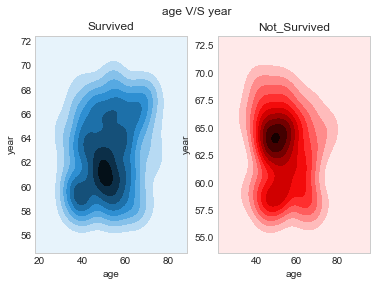

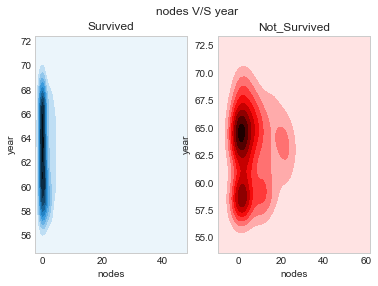

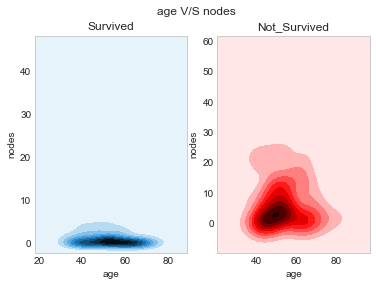

In [9]:
# Bivariate analysis of all the features

plt.close()
fig,(ax1,ax2)=plt.subplots(1,2)

plt.suptitle('age V/S year')
ax1.title.set_text('Survived')
ax1.set_xlabel('age')
ax1.set_ylabel('year')
ax2.title.set_text('Not_Survived')
ax2.set_xlabel('age')
ax2.set_ylabel('year')

sns.set_style('whitegrid')
sns.jointplot(x='age',y='year',data=Survived,kind="kde",size=4,ax=ax1)
sns.jointplot(x='age',y='year',data=Not_Survived,kind="kde",size=4,ax=ax2,color='r')

plt.close()
plt.close()
plt.show()


plt.close()
fig,(ax1,ax2)=plt.subplots(1,2)

plt.suptitle('nodes V/S year')
ax1.title.set_text('Survived')
ax1.set_xlabel('nodes')
ax1.set_ylabel('year')
ax2.title.set_text('Not_Survived')
ax2.set_xlabel('nodes')
ax2.set_ylabel('year')


sns.jointplot(x='nodes',y='year',data=Survived,kind="kde",size=4,ax=ax1,)
sns.jointplot(x='nodes',y='year',data=Not_Survived,kind="kde",size=4,ax=ax2,color='r')
plt.suptitle('age V/S year')

plt.close()
plt.close()
plt.show()


plt.close()
fig,(ax1,ax2)=plt.subplots(1,2)

plt.suptitle('age V/S nodes')
ax1.title.set_text('Survived')
ax1.set_xlabel('age')
ax1.set_ylabel('nodes')
ax2.title.set_text('Not_Survived')
ax2.set_xlabel('age')
ax2.set_ylabel('nodes')

sns.jointplot(x='age',y='nodes',data=Survived,kind="kde",size=4,ax=ax1)
sns.jointplot(x='age',y='nodes',data=Not_Survived,kind="kde",size=4,ax=ax2,color='r')
plt.close()
plt.close()
plt.show()



<b>Inference from the all the plots</b><br>

<b>age V/S year plot</b><br>

There is high success rate (survival rate) between 1960-1962 and high failure rate (non-survival rate) between 1963-1965 but throughout, population tend to have average age around 50 (actual mean ~52 years for both survivors as well as non-survivors). So age and year together don't give any proper conclusion.


<b>year V/S nodes plot</b><br>
For all the operational years patients had low axil nodes in survivor's group.
During 1963-65 when there were maximum number of deaths, patients had low axil nodes as well.
So nodes and year together don't give any conclusion. 


<b>age V/S nodes plot</b><br>

For all the age groups <young, middle age and old>, axil nodes are low for survivors.
In non-survivors group, axil nodes are bit higher.


<b>Conclusion from above plots</b><br>
Survivors have generally low nodes but major portion of non-survivors(60%) also have low axil nodes(6%). So we can't say anything for axil nodes. Young age people have higher chance of survival. 


In [10]:
# Let us check once for the period of 1960-1962 (high success rate) and for the periods of 1963-1965 (high failure rate)

print('% of young people among non-survivors during 1963-1965 : ',100*len(Not_Survived[(Not_Survived.year.between(63,65)) & (Not_Survived.age<=42) ]) / len(Not_Survived[Not_Survived.year.between(63,65)]))
print('% of young people among the survivors during 1960-1962 : ' ,100*len(Survived[(Survived.year.between(60,62)) & (Survived.age<=42) ]) / len(Survived[Survived.year.between(60,62)]))

print('% of young people in the whole population',100*len(haberman[haberman.age<=42])/len(haberman))

% of young people among non-survivors during 1963-1965 :  3.4482758620689653
% of young people among the survivors during 1960-1962 :  23.80952380952381
% of young people in the whole population 20.26143790849673


<b>Findings</b><br>
1963-1965 have a higher failure rate. This is due to only 3.5% of young age people. <br>
1960-1962 has high success rate but young patients are only 24%. 

This again gives a mixed result on Survival in terms of young age.


<b><h3>Final conclusions</h3></b>
1. Dataset is imbalanced with 73.5 % people survived and 26.5 % non survived.
2. Low Axil nodes to a certain extent appear to favour survivals. However we can' be completely sure on this as 60% of    the non-survivors also have low axil nodes. 
3. Young age appear to favour the chance of survival (as younger body cells are stronger to fight against cancer) but data points given for young age population is very less (20%) as compared to total population. So in order to conclude anything on the age we need more data points. 
4. No clear inference can be drawn from the dataset as no particular factor looks to be the most prominent/conclusive of all. So it is difficult to explain the behavior of dataset with simple EDA analysis. We need more advanced technique to analyse the dataset.
